## Pandas Data Manipulation Lab

This lab is intentionally open-ended, and you're encouraged to answer your own inquisitivities about the dataset.

#### Lab Summary

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

You must provide, at least, a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?

#### Minimum Requirements

At a minimum, you must:

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

At a maximum, you should strive:

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualization* (tomorrow will help)

In [1]:
import pandas as pd
file = '../data/billboard.csv'
billboard = pd.read_csv(file)

In [2]:
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

In [3]:
billboard.columns = [c.replace('.', '_') for c in billboard.columns]
# billboard.describe()
billboard.isnull().sum()
billboard_dropna = billboard.dropna(how='all')
print len(billboard_dropna)
## 317 rows with null values ...
## but 0 rows with all null values:
# billboard[billboard.isnull().all(1)]
# billboard.describe()

billboard = billboard.dropna(1, how='all')
billboard.shape



317


(317, 72)

In [4]:
import datetime as dt
import time

billboard.date_entered = pd.to_datetime(billboard.date_entered)
billboard.date_peaked = pd.to_datetime(billboard.date_peaked)
billboard['days_to_peak'] = billboard.date_peaked - billboard.date_entered


In [5]:
billboard.artist_inverted.value_counts(ascending=False)
import numpy as np
import re
import datetime
billboard['days_to_peak'] = billboard.days_to_peak.map( lambda x: str(x))
billboard['days_to_peak'] = billboard.days_to_peak.map( lambda x: int(x.split()[0]))


In [6]:
# import seaborn as sns
# sns.pairplot(billboard)
# plt.show()

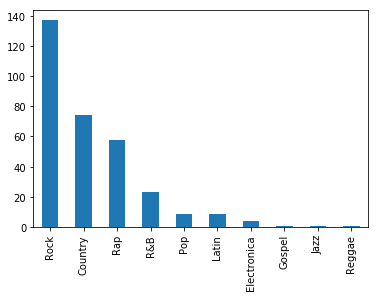

In [7]:
billboard.genre.value_counts().plot(kind='bar')
# drinks.continent.value_counts().plot(kind='bar')
# drinks.groupby('continent').mean().plot(kind='bar')
# billboard[billboard.date_peaked=='2000-12-02']
plt.show()


The overwhelming majority of top songs are in the Rock genre. However, I think that many songs classified as 'Rock' need to be corrected to either 'Pop' or 'R&B'. This reclassification could definitely bump those two genres up. How could Savage Garden possibly be 'Rock'???? 

This bothered me enough to create my own version of this dataset with accurate genres filled in.

In [9]:
billboard[billboard.genre=='Rock']

,year,artist_inverted,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x57th_week,x58th_week,x59th_week,x60th_week,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week,days_to_peak
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
10,2000,N'Sync,It's Gonna Be Me,3:10,Rock,2000-05-06,2000-07-29,82,70.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84
12,2000,Vertical Horizon,Everything You Want,4:01,Rock,2000-01-22,2000-07-15,70,61.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175
13,2000,Creed,With Arms Wide Open,3:52,Rock,2000-05-13,2000-11-11,84,78.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182


In [11]:
billboard[billboard.artist_inverted=='Hill, Faith']

,year,artist_inverted,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x57th_week,x58th_week,x59th_week,x60th_week,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week,days_to_peak
17,2000,"Hill, Faith",Breathe,4:04,Rap,1999-11-06,2000-04-22,81,68.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168
190,2000,"Hill, Faith",Let's Make Love,4:11,Rap,2000-08-12,2000-10-21,83,83.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70


In [10]:
## I went through each song and made sure that the artist was classified in the correct genre

import pandas as pd
file = '../data/billboard_ACCURATE.csv'
billboard_edited = pd.read_csv(file)
billboard_edited.columns = [c.replace('.', '_') for c in billboard_edited.columns]


In [11]:
billboard_edited.genre.value_counts()


Country        74
R&B            72
Rap            56
Rock           51
Pop            44
Latin          10
Electronica     5
Gospel          2
Reggae          2
Jazz            1
Name: genre, dtype: int64

Well now I'm mad that Country is on top. I hate country. I even went back through the file to double check that each artist in the Country genre was actually Country and was only able to change one. I'm sad.

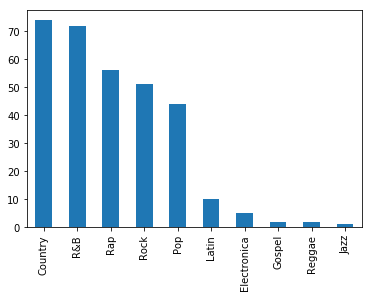

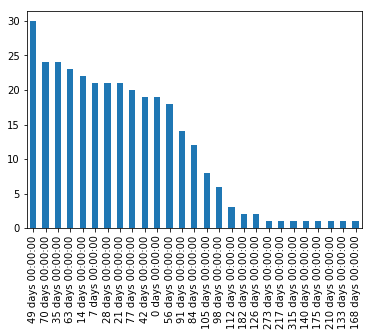

In [25]:
import datetime as dt
import time
## convert dates to date format
billboard_edited.date_entered = pd.to_datetime(billboard_edited.date_entered)
billboard_edited.date_peaked = pd.to_datetime(billboard_edited.date_peaked)

## create a column showing the number of days it took the song to reach its peak
billboard_edited['days_to_peak'] = billboard_edited.date_peaked - billboard_edited.date_entered
# billboard_edited['days_to_peak'] = pd.to_numeric(billboard_edited.days_to_peak)

billboard_edited.genre.value_counts().plot(kind='bar')
plt.show()

billboard_edited.days_to_peak.value_counts().plot(kind='bar')
plt.show()


In [41]:
days_string = str(billboard_edited.days_to_peak)
for day in days_to_peak:
    billboard_en

'0      56 days\n1      56 days\n2      98 days\n3      35 days\n4      70 days\n5      70 days\n6      84 days\n7      84 days\n8      49 days\n9     273 days\n10     84 days\n11     49 days\n12    175 days\n13    182 days\n14     91 days\n15     84 days\n16     70 days\n17    168 days\n18    105 days\n19     91 days\n20     49 days\n21     98 days\n22     42 days\n23     98 days\n24    217 days\n25    112 days\n26     77 days\n27    126 days\n28    182 days\n29    112 days\n        ...   \n287     7 days\n288    70 days\n289     7 days\n290    63 days\n291     7 days\n292    14 days\n293    21 days\n294     7 days\n295    49 days\n296    21 days\n297    21 days\n298     7 days\n299     0 days\n300    49 days\n301     0 days\n302     7 days\n303    35 days\n304    21 days\n305     7 days\n306     0 days\n307     7 days\n308     0 days\n309     0 days\n310     7 days\n311     0 days\n312     0 days\n313     0 days\n314     0 days\n315     0 days\n316     0 days\nName: days_to_peak, dty

KeyError: 'time'

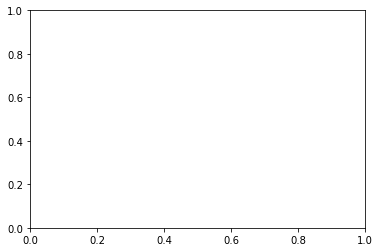

In [89]:
billboard_edited.plot(kind='scatter', x='time', y='days_to_peak', alpha=0.3)

In [91]:
import datetime as dt


billboard_edited['time'] = pd.to_datetime(billboard_edited.time)
billboard_edited['time'] = billboard_edited['time'].dt.time


TypeError: <type 'datetime.time'> is not convertible to datetime

In [100]:
billboard_edited['time'].plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot